# Homework:

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the data set.
- train a logistic regression model on the data set
- train a KNN (K=3) model on the data set
- Which model performed better?
- Which features were most relevant in each model?

In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#some new tricks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import VarianceThreshold

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


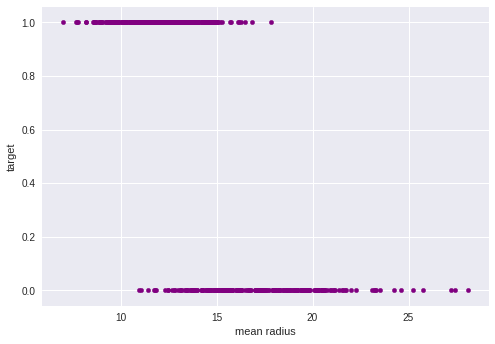

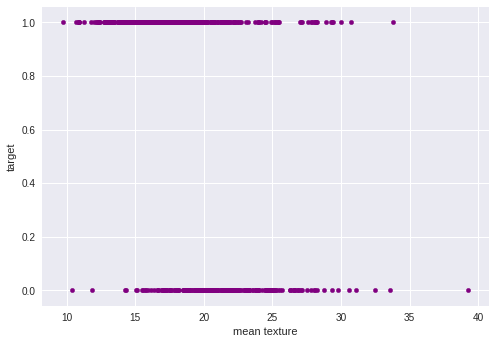

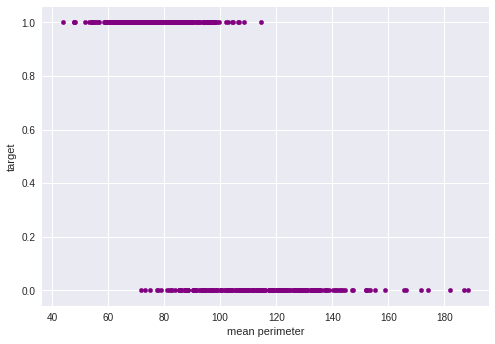

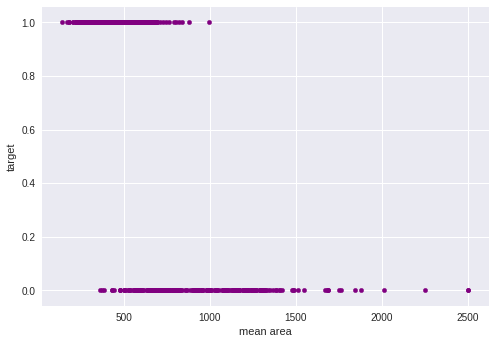

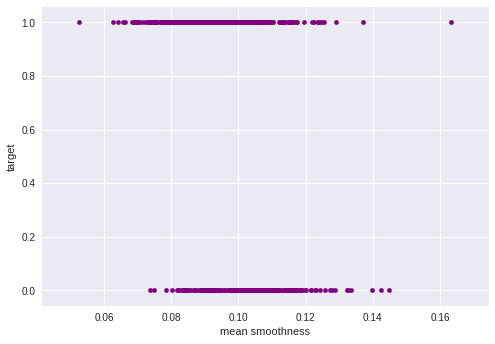

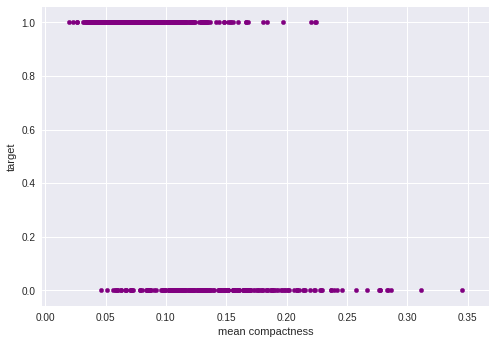

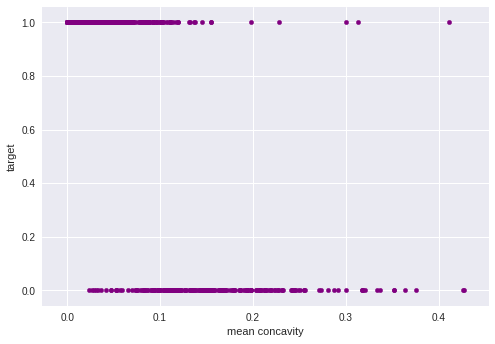

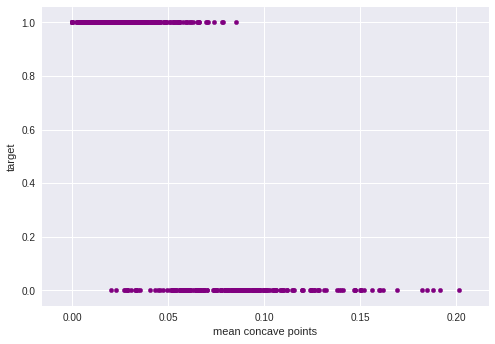

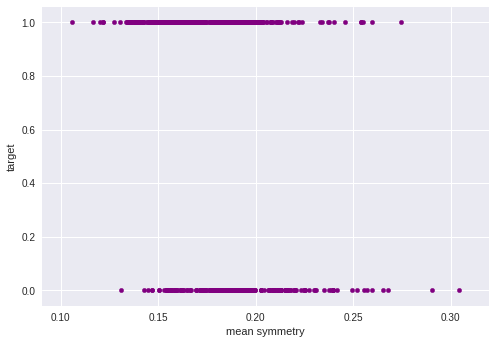

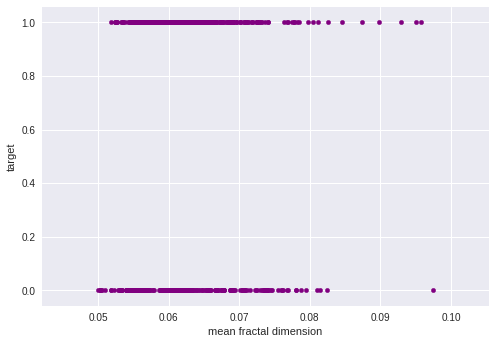

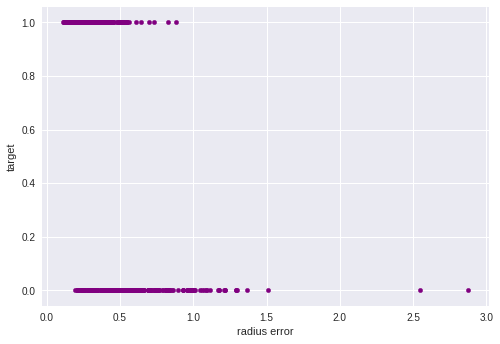

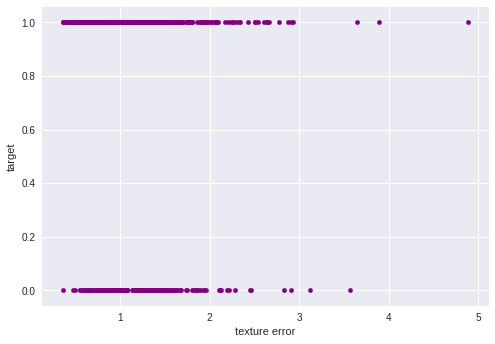

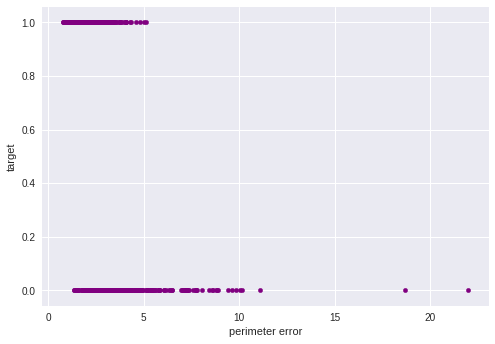

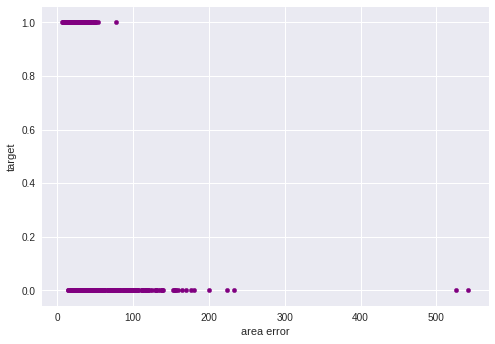

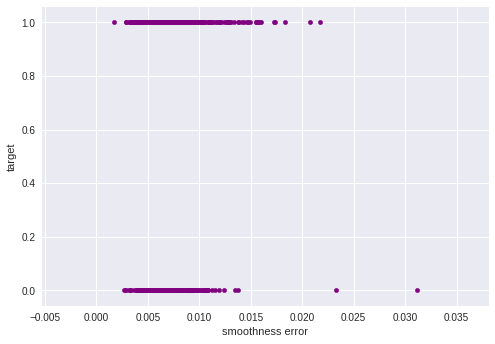

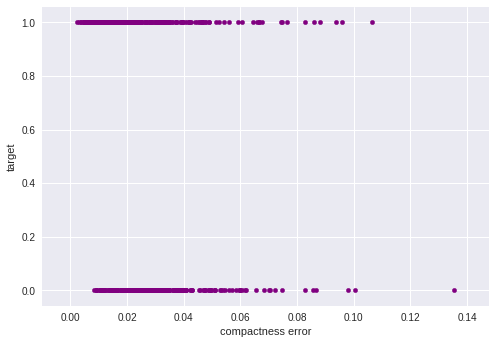

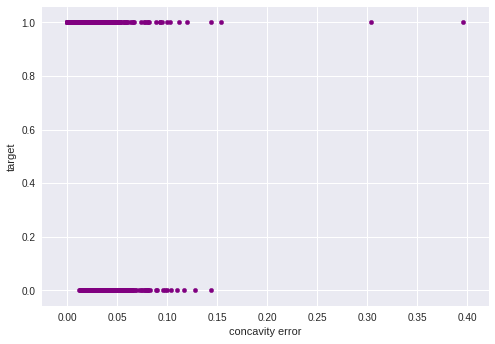

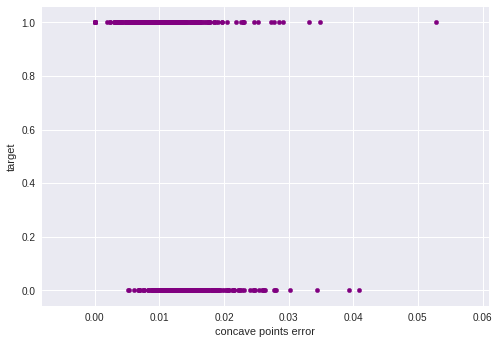

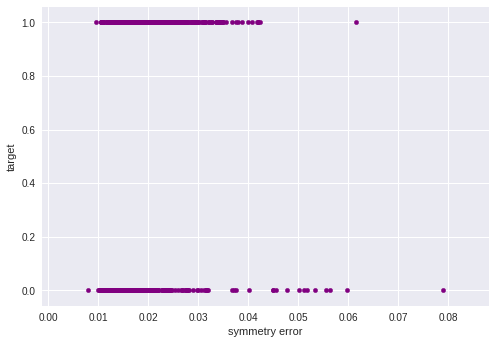

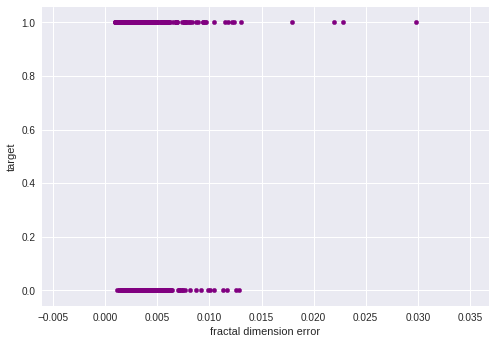

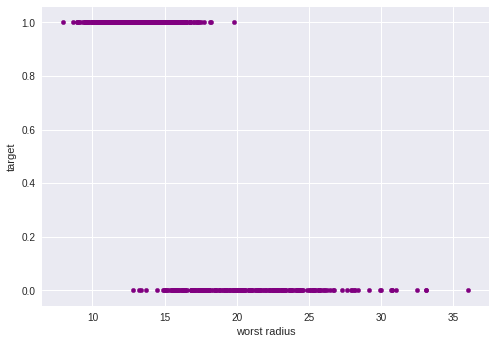

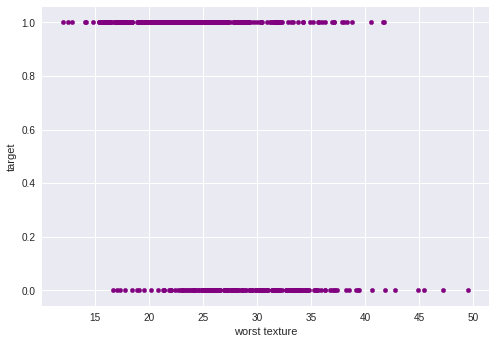

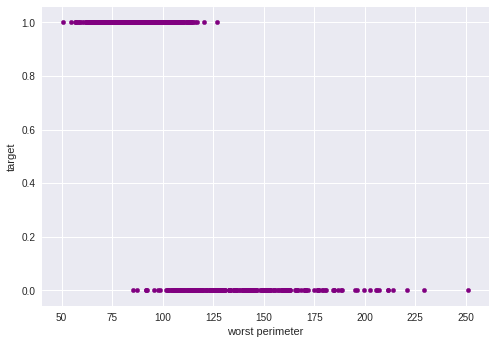

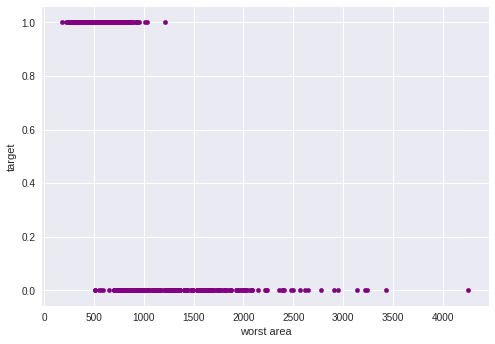

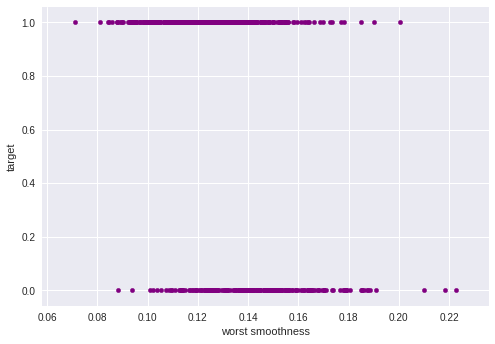

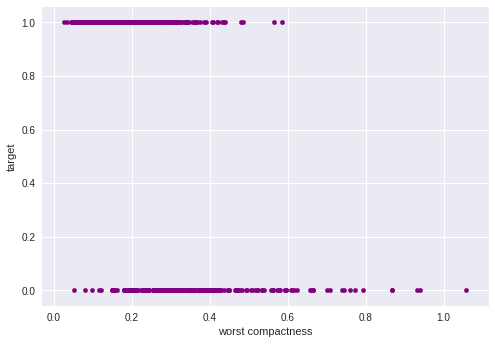

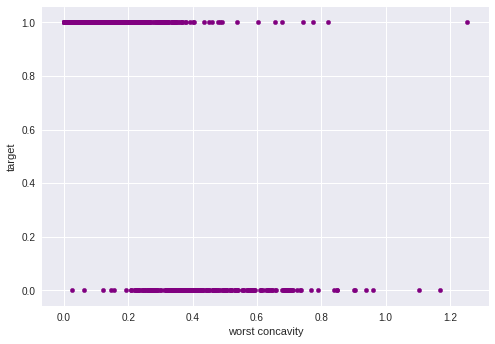

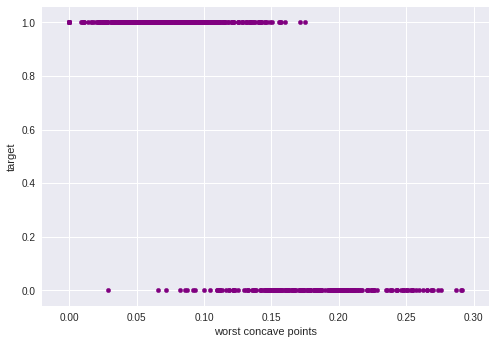

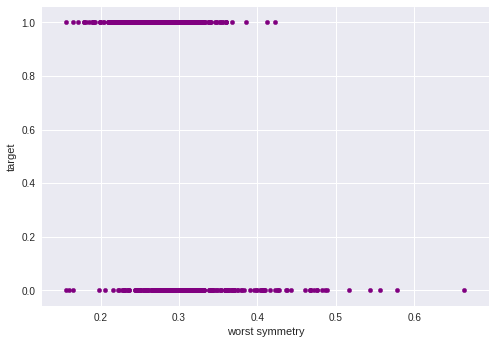

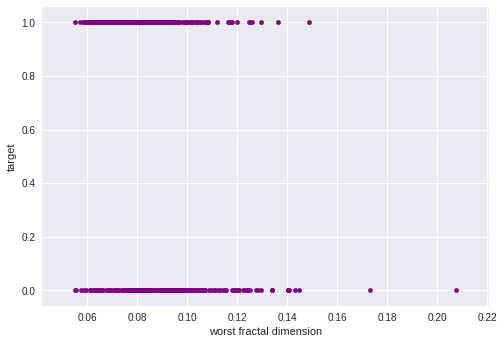

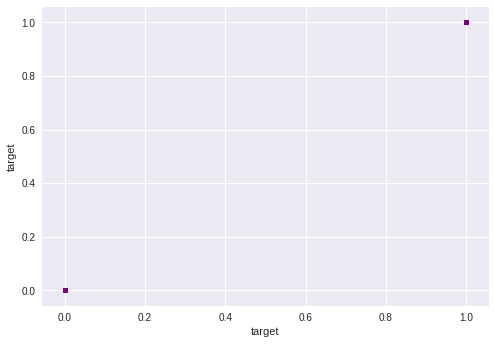

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 22 00:33:16 2019

@author: matti
"""

# loading breast cancer dataset
data=datasets.load_breast_cancer()

# making dataframe from the sklearn bunch
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

# getting scatterplots for each column in dataframe
for p in df.columns:
   df.plot.scatter(x=p,y='target',c='purple')

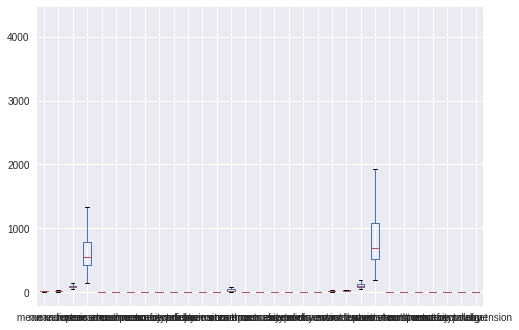

In [0]:
# getting boxolot for dataframe
df.boxplot()

In [0]:
# making training and testing dataframes
df_train, df_test = train_test_split(df, random_state=1)

In [0]:
# make a decision tree classifier, fit it with the training data
tree = DecisionTreeClassifier()
tree.fit(df_train.drop('target', axis=1), df_train['target'])
sum(tree.predict(df_test.drop('target',axis=1))==df_test['target'])

# getting a string that is the percentage of successful classifications on the testing set
perc1 = "{0:.0%}".format(sum(tree.predict(df_test.drop('target',axis=1))==df_test['target'])/df_test.shape[0])

# print percentage successful classification of the test set
print('This time, the decision tree model predicted %s correctly in the test set from being trained on the training set.'%perc1)

This time, the decision tree model predicted 93% correctly in the test set from being trained on the training set.


In [0]:
# make a logistic regression, fit it with the training data
log = LogisticRegression()
log.fit(df_train.drop('target', axis=1), df_train['target'])

# getting a string that is the percentage of successful classifications on the testing set
perc2 = "{0:.0%}".format(sum(log.predict(df_test.drop('target',axis=1))==df_test['target'])/df_test.shape[0])

# print percentage successful classification of the test set
print('This time, the logistic regression model predicted %s correctly in the test set from being trained on the training set.'%perc2)

This time, the logistic regression model predicted 95% correctly in the test set from being trained on the training set.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# make a k=3 nearest neighbor classifier, fit it with the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df_train.drop('target', axis=1), df_train['target'])

# getting a string that is the percentage of successful classifications on the testing set
perc3 = "{0:.0%}".format(sum(knn.predict(df_test.drop('target',axis=1))==df_test['target'])/df_test.shape[0])

# print percentage successful classification of the test set
print('This time, the KNN classifier predicted %s correctly in the test set from being trained on the training set.'%perc3)

This time, the KNN classifier predicted 92% correctly in the test set from being trained on the training set.


In [0]:
# All together now

# make models
tree = DecisionTreeClassifier()
log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)

# make X and y
X = df_train.drop('target', axis=1)
y = df_train['target']

# train models
tree.fit(X,y)
log.fit(X,y)
knn.fit(X,y)

# get percent successful classification on test data
perc1 = "{0:.0%}".format(sum(tree.predict(df_test.drop('target',axis=1))==df_test['target'])/df_test.shape[0])
perc2 = "{0:.0%}".format(sum(log.predict(df_test.drop('target',axis=1))==df_test['target'])/df_test.shape[0])
perc3 = "{0:.0%}".format(sum(knn.predict(df_test.drop('target',axis=1))==df_test['target'])/df_test.shape[0])

# print results
print('This time, the decision tree model predicted %s correctly in the test set from being trained on the training set.'%perc1)
print('This time, the logistic regression model predicted %s correctly in the test set from being trained on the training set.'%perc2)
print('This time, the KNN classifier predicted %s correctly in the test set from being trained on the training set.'%perc3)

This time, the decision tree model predicted 97% correctly in the test set from being trained on the training set.
This time, the logistic regression model predicted 95% correctly in the test set from being trained on the training set.
This time, the KNN classifier predicted 92% correctly in the test set from being trained on the training set.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Results
Over multiple runs of fitting the models to the training data, it was found that the decision tree model was the only model to have any variance run-to-run, whereas the logistic regression and 3-NN classifier produced consistant results.

The decision tree model overall had the capability to produce the highest success rate, but this varied from 92%-97%.
The logistic regression consistently produced a 95% success rate.
The 3-NN classifier consistently produced a 92% success rate.

# Conclusion
Given the variability of the decision tree classifier, it is not an ideal model to use for stability purposes. The logistic regression produced the most consistent and highest accuracy results of all three models.

**Which features were most relevant in each model?...**

In [0]:
# check which features we are working with
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [0]:
# using RFE for feature selection
from sklearn.feature_selection import RFE

# make a list of all the models created so far, to loop through for determining average feature selection
#mods = [tree,log,knn]
# it was discovered that the KNN model cannot be scored with many of te feature selection tools
mods = [tree,log]

for c in mods:
    rfe = RFE(c,3)
    rfe = rfe.fit(X,y)
    print(rfe.ranking_)

[28 26 25 24 20 19 18  3 16 14 13 12 11  4  9 27 22  2 17 15 10  1  1  8
  5  7  6  1 21 23]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ 2 11 17 28 18 21  1  5  9 26  4 10  7  8 25 19 20 23 22 27  1 12  6 24
 16 13  1  3 15 14]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

For DFE, features of highest importance to the model are assigned a 1.

It looks like the three most significant features for the decision tree model were:
*   Worst perimeter
*   Worst texture
*   Worst concave points

It looks like the three most significant features for the logistic regression were:
*   Mean concavity
*   Worst radius
*   Worst concavity